In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [2]:
import re
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# get  X_train and Y _train and X_test and Y_test
import re 
import codecs
def read_data(file_path):
  X = []
  Y = []
  pos_num=0
  neg_num=0
  file1= codecs.open(file_path, 'r', 'utf-8')
  for line in file1:
    if line == "nan" or line == "\n":
      continue
    out = line.split(',')
    X.append(out[0])
    label=out[1]
    if "OFF" in label:
      Y.append(1)
      pos_num+=1
    else:
      Y.append(0)
      neg_num+=1

  return X,Y, pos_num, neg_num# # read data test
 
x_train, y_train, pos_num, neg_num = read_data('/content/drive/My Drive/OffensEval 2020/Data/offensive_eval_subtask_A/taskA_cleaned_train_file1.txt')
print(len(y_train))
x_val, y_val, pos_num1, neg_num1 = read_data('/content/drive/My Drive/OffensEval 2020/Data/offensive_eval_subtask_A/taskA_cleaned_validation_file1.txt')
print(len(y_val))

Using TensorFlow backend.


6840
1001


In [0]:
# feature Extraction 
# Tfidf extration

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train) 
x_val = vectorizer.transform(x_val)
 

In [0]:
# feature Extraction 
# BOW (Bag of words)

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
X_train = count_vec.fit_transform(X_train) 
X_test = count_vec.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6068, 27671)
(1712, 27671)


In [0]:
# feature Extraction 
# Feature Hashing (Bag of words)

from sklearn.feature_extraction.text import HashingVectorizer
FH =HashingVectorizer()
X_train = FH.fit_transform(X_train) 
X_test = FH.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6068, 1048576)
(1712, 1048576)


In [0]:
from keras.utils import np_utils
# Encodeing Y_train and Y_test 
#------------------------
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
#------------------------
label_encoder.fit(y_val)
encoded_y2 = np_utils.to_categorical((label_encoder.transform(y_val)))

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
# print(transformer_bag_of_words.shape[1])
# model = Sequential()

# model.add(Dense(1000,input_shape= (transformer_bag_of_words.shape[1],)))

# model.add(Activation('relu'))

# model.add(Dropout(0.5))

# model.add(Dense(500))

# model.add(Activation('relu'))

# model.add(Dropout(0.5))

# model.add(Dense(50))

# model.add(Activation('relu'))

# model.add(Dropout(0.5))

# model.add(Dense(2))

# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam')

# print (model.summary())
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import layers
from keras import metrics
model = Sequential()

# embedding layer
model.add(Embedding(1000,
                        20,
                        input_length=(x_train.shape[1])
                    )
            )
# dropout layer
model.add(Dropout(0.2))
# convolutional layer 
model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',precision_m, recall_m, f1_m])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 29156, 20)         20000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 29156, 20)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 29154, 64)         3904      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 256)              

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
# param_grid = dict(num_filters=[ 128],
#                       kernel_size=[ 7],
#                       vocab_size=[1000],
#                       embedding_dim=[100],
#                       maxlen=[100])
# model = KerasClassifier(build_fn=create_model,
#                             epochs=10, batch_size=10,
#                             verbose=False)
# grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
#                               cv=4, verbose=1, n_iter=5)
history = model.fit((x_train).todense(), encoded_y,validation_data=((x_val).todense(), encoded_y2), batch_size=100, epochs=10,verbose=1)

Train on 6840 samples, validate on 1001 samples
Epoch 1/10
6840/6840 [==============================] - 196s 29ms/step - loss: 0.5319 - acc: 0.7963 - precision_m: 0.8001 - recall_m: 0.7905 - f1_m: 0.7925 - val_loss: 0.5043 - val_acc: 0.8212 - val_precision_m: 0.8212 - val_recall_m: 0.8212 - val_f1_m: 0.8212
Epoch 2/10
6840/6840 [==============================] - 196s 29ms/step - loss: 0.5035 - acc: 0.7996 - precision_m: 0.7996 - recall_m: 0.7996 - f1_m: 0.7996 - val_loss: 0.5144 - val_acc: 0.8212 - val_precision_m: 0.8212 - val_recall_m: 0.8212 - val_f1_m: 0.8212
Epoch 3/10
6840/6840 [==============================] - 195s 29ms/step - loss: 0.5020 - acc: 0.7996 - precision_m: 0.7996 - recall_m: 0.7996 - f1_m: 0.7996 - val_loss: 0.5127 - val_acc: 0.8212 - val_precision_m: 0.8212 - val_recall_m: 0.8212 - val_f1_m: 0.8212
Epoch 4/10
6840/6840 [==============================] - 196s 29ms/step - loss: 0.5029 - acc: 0.7996 - precision_m: 0.7996 - recall_m: 0.7996 - f1_m: 0.7996 - val_loss: 0

KeyboardInterrupt: ignored

In [19]:
# Best F1_score
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer
import numpy as np


def bestThresshold(y_train,train_preds):
    tmp = [0,0,0] # idx, cur, max
    delta = 0
    for tmp[0] in tqdm(np.arange(0.1, 0.501, 0.01)):
        tmp[1] = f1_score(y_train, np.array(train_preds)>tmp[0])
        if tmp[1] > tmp[2]:
            delta = tmp[0]
            tmp[2] = tmp[1]
    print('best threshold is {:.4f} with F1 score: {:.4f}'.format(delta, tmp[2]))
    return delta , tmp[2]
  
valid= model.predict((x_val).todense())

t=[ i[0] for i in valid] 
delta, _ = bestThresshold(y_val,t)

'''
max_len = 20  - > f1_score = 0.7633
----
with max_len = 30 -> f1_score = 0.7738
'''


best threshold is 0.1000 with F1 score: 0.3034


'\nmax_len = 20  - > f1_score = 0.7633\n----\nwith max_len = 30 -> f1_score = 0.7738\n'

In [15]:
loss, acc, precesion, recall, f1= model.evaluate((x_val).todense(), encoded_y2)
print("Loss: ",loss)
print("acc: ",acc)
print("precesion: ",precesion)
print("recall: ",recall)
print("f1: ",f1)

1001/1001 [==============================] - 6s 6ms/step
Loss:  0.5013362720057919
acc:  0.8211788211788211
precesion:  0.8211788211788211
recall:  0.8211788211788211
f1:  0.8211787621100823


In [0]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
def plot_confusion_matrix(y_test,y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  clf_report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
  # .iloc[:-1, :] to exclude support
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True) 

In [0]:
 
def predict_with_best_threshold(y_predict , threshold):
  predict=[]
  for i in range(len(y_predict)):
    if y_predict[i] >= threshold :
      predict.append(1)
    else :
      predict.append(0)
  return predict

 

0.7132604


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


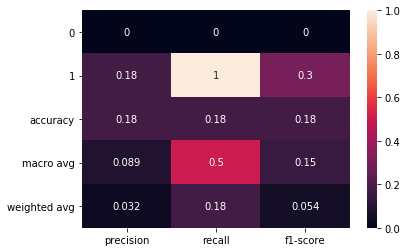

In [29]:
# word2vec
valid= model.predict((x_val).todense())

t=[ i[0] for i in valid] 
print(t[1])
pre = predict_with_best_threshold(t ,delta  )
 
plot_confusion_matrix(y_val, pre, classes=list(set(y_val)))

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored